# *Import package*

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn import preprocessing

# Exploratory Data Analysis

## I. *Import Data*

In [70]:
order = pd.read_csv('eCommerce_Business_Trends/olist_orders_dataset.csv')
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [71]:
customer = pd.read_csv('eCommerce_Business_Trends/olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [72]:
item = pd.read_csv('eCommerce_Business_Trends/olist_order_items_dataset.csv')
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## II. *Pre-Processing*

### 1. Join Data

In [73]:
order_customer = pd.merge(order,customer,on = 'customer_id',how='left')
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [74]:
df = pd.merge(order_customer,item,on='order_id',how='left')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


### 2. *Remove Variable*

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   customer_unique_id             113425 non-null  object 
 9   customer_zip_code_prefix       113425 non-null  int64  
 10  customer_city                  113425 non-null  object 
 11  customer_state                 113425 non-null  object 
 12  order_item_id                 

In [76]:
df = df.drop(['customer_id', 'seller_id','shipping_limit_date','customer_zip_code_prefix'], axis = 1)

In [77]:
df=df[df['order_status']=='delivered']
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72


In [78]:
df.drop(['order_status'], axis = 1,inplace=True) 

### 3. *Data Tranformation*

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110197 non-null  object 
 1   order_purchase_timestamp       110197 non-null  object 
 2   order_approved_at              110182 non-null  object 
 3   order_delivered_carrier_date   110195 non-null  object 
 4   order_delivered_customer_date  110189 non-null  object 
 5   order_estimated_delivery_date  110197 non-null  object 
 6   customer_unique_id             110197 non-null  object 
 7   customer_city                  110197 non-null  object 
 8   customer_state                 110197 non-null  object 
 9   order_item_id                  110197 non-null  float64
 10  product_id                     110197 non-null  object 
 11  price                          110197 non-null  float64
 12  freight_value                 

In [80]:
df.iloc[:, 1:6] = df.iloc[:,1:6].apply(pd.to_datetime,errors ='coerce')
df['order_item_id']= df['order_item_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110197 entries, 0 to 113424
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  object        
 1   order_purchase_timestamp       110197 non-null  datetime64[ns]
 2   order_approved_at              110182 non-null  datetime64[ns]
 3   order_delivered_carrier_date   110195 non-null  datetime64[ns]
 4   order_delivered_customer_date  110189 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110197 non-null  datetime64[ns]
 6   customer_unique_id             110197 non-null  object        
 7   customer_city                  110197 non-null  object        
 8   customer_state                 110197 non-null  object        
 9   order_item_id                  110197 non-null  object        
 10  product_id                     110197 non-null  object        
 11  

### 4. *Remove Duplicate*

In [81]:
df.duplicated().sum()

0

### 5. *Detection Noise*

In [82]:
df.describe()

,price,freight_value
count,110197.000000,110197.000000
mean,119.980563,19.948598
std,182.299446,15.698136
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.900000,16.260000
75%,134.170000,21.150000
max,6735.000000,409.680000


### 6. *Missing value*

In [83]:
df.isnull().sum()

order_id                          0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
price                             0
freight_value                     0
dtype: int64

In [84]:
(100*df.isnull().sum()/len(df)).to_frame('persentase missing')

,persentase missing
order_id,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.013612
order_delivered_carrier_date,0.001815
order_delivered_customer_date,0.007260
order_estimated_delivery_date,0.000000
customer_unique_id,0.000000
customer_city,0.000000
customer_state,0.000000
order_item_id,0.000000


In [85]:
df.dropna(axis=0,how='any',inplace=True)

In [86]:
df.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
dtype: int64

In [87]:
df.shape

(110173, 13)

 # III. Clustering 

### 1. *Prepare Dataset*

In [88]:
df['Latest'] = max(df['order_purchase_timestamp'])
df['range time'] = df['Latest'] - df['order_purchase_timestamp']
recent = df.groupby('customer_unique_id').agg({'range time': 'min'}).reset_index(drop=True)
df_cust = df.groupby('customer_unique_id').agg({'order_id': 'count',
                                           'price': 'sum',
                                           'freight_value':'sum'}).reset_index(drop=True)
df_cust.head()

,order_id,price,freight_value
0,1,129.90,12.00
1,1,18.90,8.29
2,1,69.00,17.22
3,1,25.99,17.63
4,1,180.00,16.89


In [89]:
df

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,Latest,range time
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,2018-08-29 15:00:37,331 days 04:04:04
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,2018-08-29 15:00:37,35 days 18:19:00
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,2018-08-29 15:00:37,21 days 06:21:48
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,2018-08-29 15:00:37,283 days 19:32:31
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,2018-08-29 15:00:37,196 days 17:41:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,2018-08-29 15:00:37,204 days 02:01:39
113421,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,2018-08-29 15:00:37,367 days 00:13:54
113422,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2018-08-29 15:00:37,232 days 17:32:10
113423,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,2018-08-29 15:00:37,232 days 17:32:10


In [90]:
rfm = pd.DataFrame()
rfm['Recency'] = recent['range time'].astype('timedelta64[D]')
rfm['Frequency'] = df_cust['order_id']
rfm['Monetary'] = df_cust['price'] + df_cust['freight_value']
rfm.head()

,Recency,Frequency,Monetary
0,111.0,1,141.90
1,114.0,1,27.19
2,536.0,1,86.22
3,320.0,1,43.62
4,287.0,1,196.89


### 2. *Remove Outliers for the Clustering Process*

In [91]:
isf = IsolationForest(random_state=42)
isf.fit(rfm)
print(isf.get_params())

{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Outlier and Non-Outlier Data by Isolation Forest')

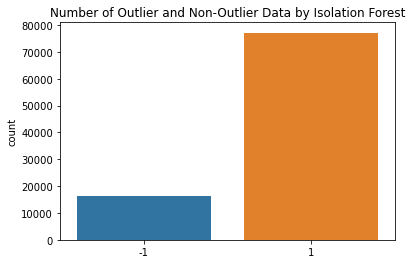

In [92]:
y_pred_train = isf.predict(rfm)
sns.countplot(y_pred_train)
plt.title('Number of Outlier and Non-Outlier Data by Isolation Forest')

In [93]:
rfm['Outlier'] = y_pred_train
rfm.head()

,Recency,Frequency,Monetary,Outlier
0,111.0,1,141.90,1
1,114.0,1,27.19,1
2,536.0,1,86.22,1
3,320.0,1,43.62,1
4,287.0,1,196.89,1


### 3. *Data analysis*

#### Case 1: Not an Outlier

In [94]:
rfm[rfm['Outlier']==1].describe()

,Recency,Frequency,Monetary,Outlier
count,77123.000000,77123.000000,77123.000000,77123.0
mean,225.907589,1.022717,116.842659,1.0
std,140.858982,0.149001,79.502228,0.0
min,0.000000,1.000000,10.070000,1.0
25%,113.000000,1.000000,57.970000,1.0
50%,210.000000,1.000000,95.990000,1.0
75%,324.000000,1.000000,154.895000,1.0
max,559.000000,2.000000,512.210000,1.0


#### Case 1: Not Outlier

In [95]:
rfm[rfm['Outlier']==-1].describe()

,Recency,Frequency,Monetary,Outlier
count,16213.000000,16213.000000,16213.000000,16213.0
mean,289.211559,1.930426,395.052725,-1.0
std,190.485364,1.197124,448.152798,0.0
min,0.000000,1.000000,9.590000,-1.0
25%,113.000000,1.000000,126.620000,-1.0
50%,277.000000,2.000000,258.900000,-1.0
75%,459.000000,2.000000,516.660000,-1.0
max,713.000000,24.000000,13664.080000,-1.0


### 4. *Clustering Applications*

In [96]:
rfm_noout = rfm[rfm['Outlier']==1]
rfm_noout.drop('Outlier',axis=1,inplace=True)
rfm_noout.head()

E:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Recency,Frequency,Monetary
0,111.0,1,141.90
1,114.0,1,27.19
2,536.0,1,86.22
3,320.0,1,43.62
4,287.0,1,196.89


#### Distribution plot of RFM (recency, frequency, monetary)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

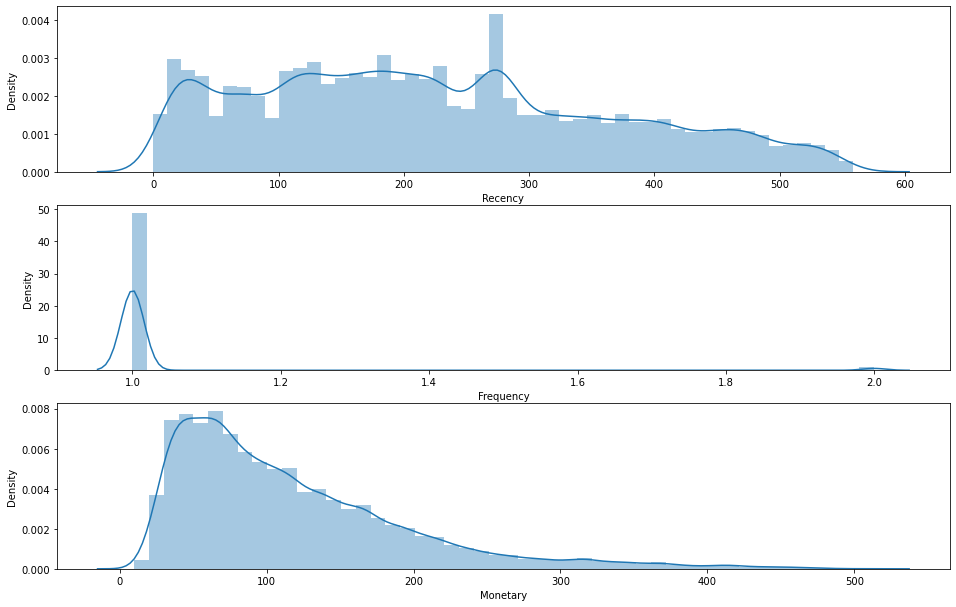

In [97]:

plt.figure(figsize=(16, 14))
plt.subplot(4, 1, 1)
sns.distplot(rfm_noout['Recency'])

plt.subplot(4, 1, 2)
sns.distplot(rfm_noout['Frequency'])

plt.subplot(4, 1, 3)
sns.distplot(rfm_noout['Monetary'])

plt.show()

#### *Normalization Process*

In [98]:
rfm_norm =  preprocessing.normalize(rfm_noout)
rfm_norm_df = pd.DataFrame(rfm_norm)
rfm_norm_df.describe()

,0,1,2
count,77123.000000,77123.000000,77123.000000
mean,0.780856,0.005196,0.493568
std,0.253663,0.003989,0.286824
min,0.000000,0.001740,0.026803
25%,0.672180,0.002725,0.238441
50%,0.894022,0.003928,0.447964
75%,0.971152,0.006127,0.740370
max,0.999638,0.046788,0.999993


In [99]:
distorsions = []
for k in range(2,10):
    kmeans = cluster.KMeans(n_clusters=k,init='k-means++').fit(rfm_norm_df)
    distorsions.append(kmeans.inertia_)

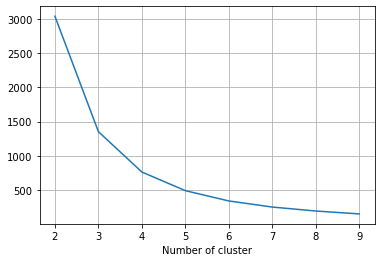

In [100]:
plt.plot(range(2,10),distorsions)
plt.grid(True)
plt.xlabel("Number of cluster")
plt.show()

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([3, 2, 2, 2, 0, 3, 2, 2, 0, 2])

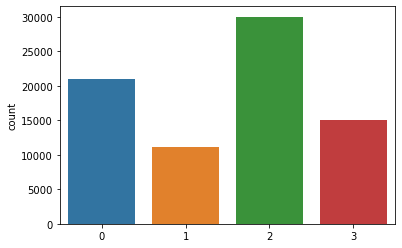

In [101]:
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', n_jobs=-1, random_state = 99)
kmPP.fit(rfm_norm_df)
C_kmpp = kmPP.predict(rfm_norm_df)
#plot jumlah data dari masing-masing kelompok
sns.countplot(C_kmpp)
C_kmpp[:10]

In [102]:
# mapper = umap.UMAP(random_state=123).fit_transform(rfm_norm_df)

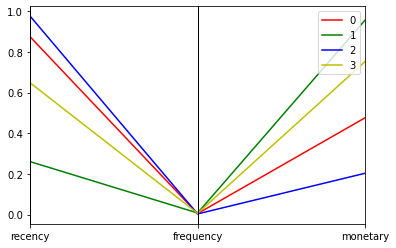

In [103]:
cols = ['recency','frequency','monetary']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y'))
plt.grid(b=None, which='major', axis='both',color='gray')
plt.show()

In [104]:
clus = pd.DataFrame(kmPP.cluster_centers_)
color=['red', 'green', 'blue','yellow']
clus.columns = cols
clus['color']=color
clus

,recency,frequency,monetary,color
0,0.874414,0.005114,0.476122,red
1,0.260468,0.008071,0.956376,green
2,0.975897,0.003474,0.203394,blue
3,0.648166,0.006607,0.752549,yellow


In [105]:
rfm_noout['Kelas']=C_kmpp
rfm_noout.groupby('Kelas').mean()

<ipython-input-105-7c72003177b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_noout['Kelas']=C_kmpp


,Recency,Frequency,Monetary
Kelas,,,
0,228.042846,1.044181,122.875599
1,48.866290,1.000000,174.204857
2,330.306248,1.000000,65.907131
3,145.367333,1.055067,167.793475


#### Case 2: Outlier

In [106]:
rfm_out = rfm[rfm['Outlier']==-1]
rfm_out.drop('Outlier',axis=1,inplace=True)
rfm_out.head()

E:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Recency,Frequency,Monetary
7,182.0,2,419.18
18,376.0,2,257.44
22,34.0,4,362.36
25,362.0,2,212.16
26,584.0,1,76.11


E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

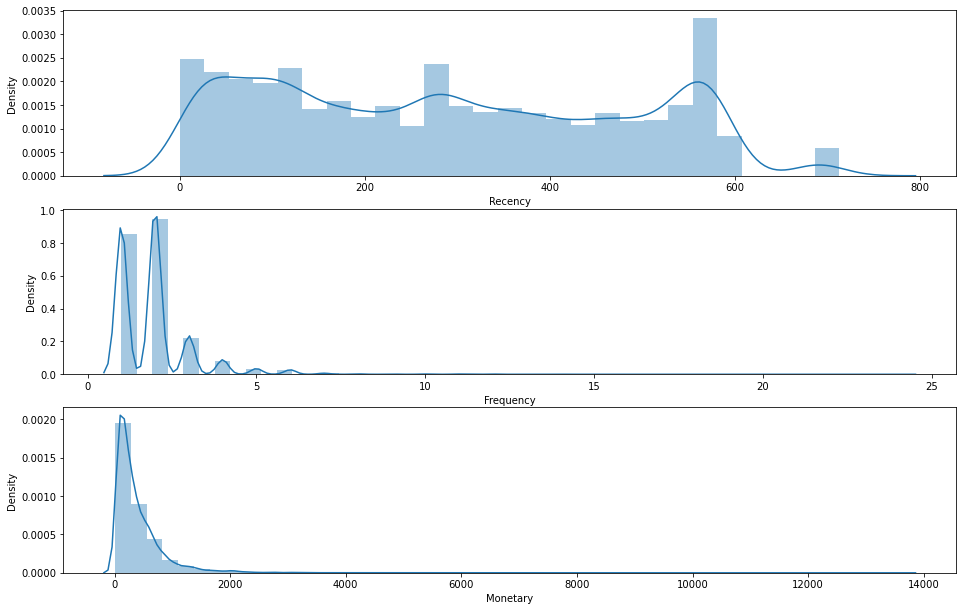

In [107]:
plt.figure(figsize=(16, 14))
plt.subplot(4, 1, 1)
sns.distplot(rfm_out['Recency'])

plt.subplot(4, 1, 2)
sns.distplot(rfm_out['Frequency'])

plt.subplot(4, 1, 3)
sns.distplot(rfm_out['Monetary'])

plt.show()

In [108]:
rfm_out_norm =  preprocessing.normalize(rfm_out)
rfm_out_norm_df = pd.DataFrame(rfm_out_norm)
rfm_out_norm_df.describe()

,0,1,2
count,16213.000000,16213.000000,16213.000000
mean,0.589046,0.005793,0.668059
std,0.332272,0.006240,0.310255
min,0.000000,0.000144,0.025656
25%,0.278870,0.001690,0.382279
50%,0.634550,0.004082,0.772810
75%,0.924034,0.007389,0.960327
max,0.999669,0.099030,0.999999


In [109]:
distorsions_out = []
for k in range(2,10):
    kmeans = cluster.KMeans(n_clusters=k,init='k-means++').fit(rfm_out_norm_df)
    distorsions_out.append(kmeans.inertia_)

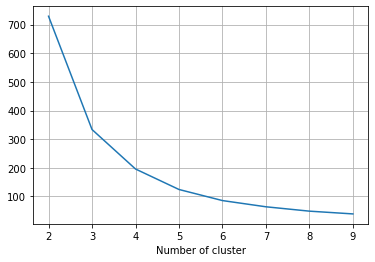

In [110]:
plt.plot(range(2,10),distorsions_out)
plt.grid(True)
plt.xlabel("Number of cluster")
plt.show()

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


array([3, 4, 2, 4, 1, 4, 3, 1, 2, 4])

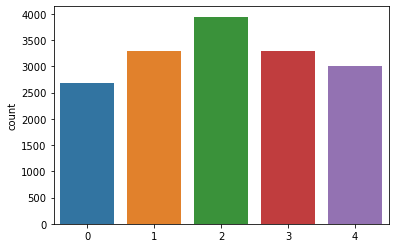

In [111]:
k=5
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', n_jobs=-1, random_state = 99)
kmPP.fit(rfm_out_norm_df)
C_kmpp = kmPP.predict(rfm_out_norm_df)
#plot jumlah data dari masing-masing kelompok
sns.countplot(C_kmpp)
C_kmpp[:10]

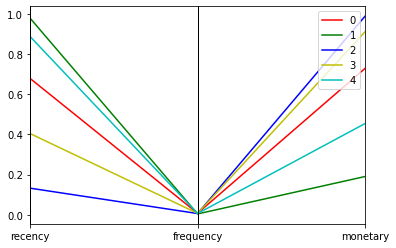

In [112]:
cols = ['recency','frequency','monetary']
dfC = pd.DataFrame(kmPP.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y','c'))
plt.grid(b=None, which='major', axis='both',color='gray')
plt.show()

In [113]:
clus = pd.DataFrame(kmPP.cluster_centers_) #akan dijadikan 'kmPP.cluster_centers_' sebagai sebuah data frame yang disimpan pada variabel 'clus'
color=['red', 'green', 'blue','yellow','cyan'] #akan ditambahkan kolom 'color' yaitu perwakilan warna dari setiap cluster
#akan ditambahkan kolom 'color' pada data 'clus'
clus.columns = cols
clus['color']=color 
clus.head()

,recency,frequency,monetary,color
0,0.678063,0.007103,0.728300,red
1,0.977960,0.003805,0.189992,green
2,0.131920,0.005703,0.988200,blue
3,0.403668,0.006741,0.910649,yellow
4,0.886562,0.005898,0.453695,cyan


In [114]:
rfm_out['Kelas']=C_kmpp
rfm_out.groupby('Kelas').mean()

<ipython-input-114-9b5330a84cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_out['Kelas']=C_kmpp


,Recency,Frequency,Monetary
Kelas,,,
0,307.652530,2.153274,330.885197
1,487.693524,1.593493,89.609681
2,94.540959,1.902866,757.273568
3,214.101127,2.035029,494.730393
4,392.798671,2.021595,202.895223
